# Table of Contents
 <p><div class="lev2 toc-item"><a href="#start" data-toc-modified-id="start-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>start</a></div><div class="lev2 toc-item"><a href="#Bootstrap-regions-file" data-toc-modified-id="Bootstrap-regions-file-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Bootstrap regions file</a></div><div class="lev3 toc-item"><a href="#estimate-SAF's" data-toc-modified-id="estimate-SAF's-021"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>estimate SAF's</a></div><div class="lev2 toc-item"><a href="#Get-intersection-of-sites-between-ERY-and-PAR" data-toc-modified-id="Get-intersection-of-sites-between-ERY-and-PAR-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Get intersection of sites between ERY and PAR</a></div><div class="lev2 toc-item"><a href="#plot-SFS-from-only-overlapping-sites" data-toc-modified-id="plot-SFS-from-only-overlapping-sites-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>plot SFS from only overlapping sites</a></div><div class="lev2 toc-item"><a href="#Bootstrap-regions-file-from-only-overlapping-sites" data-toc-modified-id="Bootstrap-regions-file-from-only-overlapping-sites-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Bootstrap regions file from only overlapping sites</a></div><div class="lev3 toc-item"><a href="#bootstrap-regions-file" data-toc-modified-id="bootstrap-regions-file-051"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>bootstrap regions file</a></div><div class="lev3 toc-item"><a href="#estimate-SAF-files" data-toc-modified-id="estimate-SAF-files-052"><span class="toc-item-num">0.5.2&nbsp;&nbsp;</span>estimate SAF files</a></div><div class="lev2 toc-item"><a href="#Bootstrap-regions-file-from-including-non-overlapping-sites" data-toc-modified-id="Bootstrap-regions-file-from-including-non-overlapping-sites-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Bootstrap regions file from including non-overlapping sites</a></div><div class="lev2 toc-item"><a href="#quick-tests" data-toc-modified-id="quick-tests-07"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>quick tests</a></div>

>In the bootstrap, you divide your sequence data into regions that can (ideally) be considered independent. Then you resample from those regions and generate new frequency spectra, using all the SNPs from each sampled region.

>Have you run any power tests? Running fits on simulated data from a plausible demographic history will give you insight as to whether it's even possible to reconstruct the history with the sample size you have.

In principle, I could simulate data sets under a RSC model with `ms` and see whether I can infer a Ti > 0.

>When doing the non-parametric bootstrapping, you want to bootstrap over regions of the genome, not just SNPs. This is because we want our resampling to capture the correlati     ons between the SNPs caused by linkage. So instead of resampling from the SNPs, you'd resample from regions you've sequenced. For example, you could break the genome up into      1 Mb chunks and resample over those. The exact region breakdown isn't critical, as long as they are large compared to the typical scale of LD in your organism.

>We typically run several optimizations on each bootstrap data set, to help ensure we find the true best fit. (Often we run optimizations until the best-3 results are all within some delta of each other.)

>if your bootstraps aren't normally distributed, it's better to report confidence intervals as quantiles, e.g. 2.5-97.5%. You can also try a log-transform.

>By default dadi masks entries for which it is having computational problems, and this can cause LLs too look too good.

I need to look out for this. dadi should emit a warning when it does this.

## start

In [1]:
# which *sites

% ll ../*sites

-rw-rw-r-- 1 claudius 29272928 Dec 11  2016 ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites
-rw-rw-r-- 1 claudius 30474263 Dec 10  2016 ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.sorted.sites
-rw-rw-r-- 1 claudius 30769819 Nov 25  2016 ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSDnegFisFiltered.sorted.sites
-rw-rw-r-- 1 claudius 30818723 Nov 22  2016 ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.noNegFis.sorted.sites
lrwxrwxrwx 1 claudius       74 Nov 16  2016 ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.sorted.sites -> ../BOWTIE2/BAM/ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.sorted.sites


The `sites` file to use is `../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites`.

In [1]:
from collections import defaultdict

In [2]:
# open sites file and read into dictionary
# contigs as keys, with sites as values collected in array 

SITES = defaultdict(list)

with open("../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites") as sites_file:
    for line in sites_file:
        contig, site = line.strip().split()
        SITES[contig].append(site)

In [3]:
print SITES['Contig_16']

['8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47']


In [4]:
import numpy as np

In [5]:
# efficient bootstrapping of keys with numpy
# np.random.choice

n_contigs = len(SITES.keys())

boot_contigs = np.random.choice(SITES.keys(), size=n_contigs, replace=True)

In [6]:
boot_contigs[:10]

array(['Contig_576300', 'Contig_369988', 'Contig_30586', 'Contig_586446',
       'Contig_331129', 'Contig_261035', 'Contig_135484', 'Contig_535945',
       'Contig_229437', 'Contig_224327'], 
      dtype='|S13')

In [7]:
print n_contigs
print len(boot_contigs)

34343
34343


In [8]:
# print the number of different contigs in the bootstrap resample

print len(set(boot_contigs))

21637


In [15]:
i=0
for contig in sorted(boot_contigs):
    i+=1
    if not i> 10:
        print contig

Contig_10001
Contig_10001
Contig_100013
Contig_100013
Contig_100028
Contig_10006
Contig_10006
Contig_10011
Contig_100112
Contig_100116


In [23]:
i=0
for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
    i+=1
    if not i> 10:
        print contig

Contig_16
Contig_40
Contig_179
Contig_181
Contig_186
Contig_186
Contig_219
Contig_241
Contig_252
Contig_264


The `sites` file needs to be sorted on column 1 (contig ids) for indexing. [Lexicographical sorting seems to be enough](http://www.popgen.dk/angsd/index.php/Sites#Requirements), but I like to have the contigs sorted numerically by id. Therefore the fancy key function.

In [30]:
# write out bootstrapped *sites file

with open("0_boot.sites", "w") as out:
    for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
        for site in range(len(SITES[contig])):
            out.write(contig + "\t" + SITES[contig][site] + "\n")

Since the `sites` file is 28Mb large, I cannot create too many of them at one time without using up a lot of storage. I will therefore try to create them as they are needed for SAF calculation and then erase them again to free up storage.

In [12]:
import subprocess32 as sp

In [31]:
# index sites file

sp.call("angsd sites index 0_boot.sites 2>/dev/null", shell=True)

0

In [32]:
# create regions file

sp.call("cut -f 1 0_boot.sites | uniq > 0_boot.rf", shell=True)

0

In [40]:
cmd = "angsd -bam {0}.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/{0}/{0}.unfolded.{1} -fold 0 \
-sites {1}.sites -rf {1}.rf -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"

for POP in ['ERY', 'PAR']:
    print cmd.format(POP, "0_boot")

angsd -bam ERY.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/ERY/ERY.unfolded.0_boot -fold 0 -sites 0_boot.sites -rf 0_boot.rf -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null
angsd -bam PAR.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/PAR/PAR.unfolded.0_boot -fold 0 -sites 0_boot.sites -rf 0_boot.rf -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null


In [41]:
# create SAF files for ERY and PAR, for several bootstraps at the same time

running = []

cmd = "angsd -bam {0}.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/{0}/{0}.unfolded.{1} -fold 0 \
-sites {1}.sites -rf {1}.rf -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"

for POP in ['ERY', 'PAR']:
    #print cmd % (POP, "0_boot.sites", "0_boot.rf")
    p = sp.Popen(cmd.format(POP, "0_boot"), shell=True)
    running.append(p)

This only takes 6 minutes to finish.

In [33]:
# estimate 2D unfolded SFS with realSFS allowing enough iterations to reach convergence, one bootstrap at a time

cmd = "realSFS -P 12 -maxIter 50000 -tole 1e-6 -m 0 SAF/ERY/ERY.unfolded.{}.saf.idx SAF/PAR/PAR.unfolded.{}.saf.idx 2>/dev/null >SFS/{}.2dsfs"

In [34]:
# clean up sites file, regions file, split regions files and SAF files

In [2]:
% ll SFS

total 16
-rw-rw-r-- 1 claudius 12760 May 13 19:38 0_boot.2dsfs


In [40]:
import numpy

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

error in importing Two Locus modules


In [4]:
boot_2dsfs = dadi.Spectrum.from_file('SFS/0_boot.2dsfs.dadi')

In [5]:
boot_2dsfs.sample_sizes

array([36, 36])

In [6]:
boot_2dsfs.pop_ids = ['ery', 'par']

In [7]:
boot_2dsfs.S()

60573.298933000005

In [49]:
%matplotlib inline

import pylab

pylab.rcParams['font.size'] = 14.0
pylab.rcParams['figure.figsize'] = [12.0, 10.0]

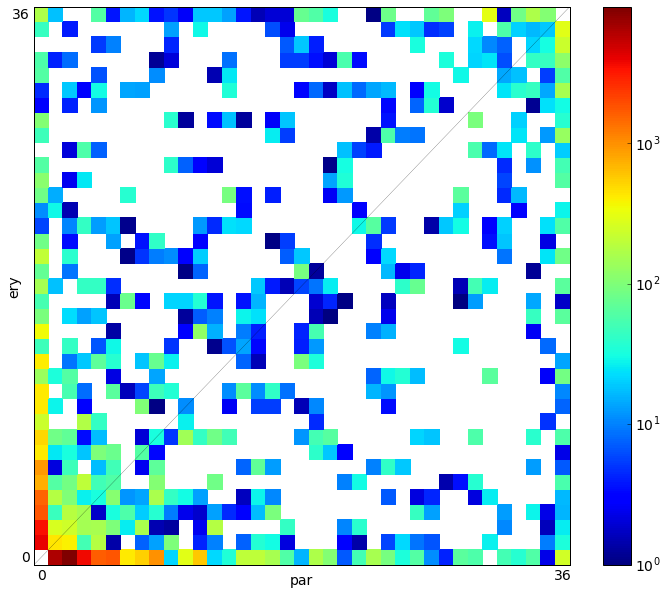

In [8]:
dadi.Plotting.plot_single_2d_sfs(boot_2dsfs, vmin=1, cmap=pylab.cm.jet)

In [10]:
!pwd

/data3/claudius/Big_Data/ANGSD/BOOTSTRAP_CONTIGS


In [11]:
% ll ../../DADI/dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619699 Apr 20 10:19 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [12]:
sfs2d = dadi.Spectrum.from_file('../../DADI/dadiExercises/EryPar.unfolded.2dsfs.dadi_format')

In [13]:
sfs2d.sample_sizes

array([36, 36])

In [14]:
sfs2d.pop_ids = ['ery', 'par']

In [15]:
sfs2d.S()

60573.584426000001

**Practically the same number of SNP's as in the bootstrapped SFS! That's not a good sign.**

In [17]:
(sfs2d - boot_2dsfs).sum()

0.28549300000018718

The bootstrap SFS is practically identical to the data SFS ?!

So the `sites` function to angsd or realSFS cannot be used for bootstrapping (see angsd issue [#81](https://github.com/ANGSD/angsd/issues/81)).

However, since the contigs are the independent units I want to resample over, it may be possible to use a bootstrapped regions file.

## Bootstrap regions file

In [11]:
# write out bootstrapped *rf file

with open("0_boot_regions.rf", "w") as out:
    for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
            out.write(contig + "\n")

In [16]:
% ll

total 130496
-rw-rw-r-- 1 claudius   300658 Jun 20 12:01 0_boot.contigs
-rw-rw-r-- 1 claudius 17624911 Jun 20 13:42 0_boot.extract
-rw-rw-r-- 1 claudius   473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius   300658 May 13 09:25 0_boot.rf
-rw-rw-r-- 1 claudius 29326563 May 13 09:24 0_boot.sites
-rw-rw-r-- 1 claudius    45188 May 13 09:25 0_boot.sites.bin
-rw-rw-r-- 1 claudius   824026 May 13 09:25 0_boot.sites.idx
-rw-rw-r-- 1 claudius    73375 Jun 15 21:41 5000_uniq_sites
-rw-rw-r-- 1 claudius      199 Jun 15 21:42 5000_uniq_sites.bin
-rw-rw-r-- 1 claudius     4133 Jun 15 21:42 5000_uniq_sites.idx
lrwxrwxrwx 1 claudius      108 Jun 30 10:37 all.sites -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites
-rw-rw-r-- 1 claudius      773 Jun 15 21:42 angsdput.arg
lrwxrwxrwx 1 claudius       18 May 13 09:30 Big_Data_ref.fa -> ../Big_Data_ref.fa
lrwxrwxrwx 1 claudius       22 May 13 09:30 Big_Data_ref.fa.fai -> ../Big_Data_re

In [ ]:
# split regions file

sp.call("split -l 500 0_boot_regions.rf SPLIT_RF/", shell=True)

In [14]:
% ll SAF

total 8
drwxrwxr-x 2 claudius 4096 Jun 30 09:37 with_boot.rf/
drwxrwxr-x 4 claudius 4096 Jun 30 09:36 with_boot.sites/


I have run angsd with GNU parallel on the split regions files and the data for ERY, then merged the SAF files with `realSFS cat`. Printing the merged SAF file with `realSFS print` then emits the following error message:

>Problem with chr: Contig_20977, key already exists, saffile needs to be sorted. (sort your -rf that you used for input)

So it looks as though realSFS is really picky about contigs occurring more than once in the SAF file, which precludes bootstrapping.

http://www.popgen.dk/angsd/index.php/RealSFS

>./realSFS cat

    -> This will cat together .saf files from angsd
    -> regions has to be disjoint between saf files. This WONT be checked (alot) !
    -> This has only been tested on safs for different chrs !

I am going to try and create SAF files which do not overlap in the contigs that they contain. For that I need to split the regions file in a way that repeated contig names (they are sorted) do not end up in different split region files.

In [9]:
from collections import Counter

In [10]:
# turn array of contigs into a hash with counts
boot_contigs_dict = Counter(boot_contigs)

In [11]:
i=0
for k,v in boot_contigs_dict.items():
    print k, v
    i+=1
    if i > 10:
        break

Contig_43174 1
Contig_102226 1
Contig_172473 2
Contig_292243 1
Contig_283507 2
Contig_177118 1
Contig_2831 3
Contig_102887 1
Contig_8131 1
Contig_250266 2
Contig_281014 1


In [13]:
len(boot_contigs_dict.keys())

21637

In [16]:
i=0
for k,v in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
    for _ in range(v):
        print k
    i+=1
    if i > 10:
        break

Contig_16
Contig_17
Contig_46
Contig_46
Contig_46
Contig_53
Contig_99
Contig_99
Contig_179
Contig_181
Contig_181
Contig_186
Contig_186
Contig_186
Contig_195
Contig_195
Contig_219
Contig_219
Contig_241


Now let's introduce a split about every 10 contigs.

In [18]:
i=0
c = 0
for k,v in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
    c+=v
    if c > 10:
        print "***************\n"
        c=v
    for _ in range(v):
        print k
    i+=1
    if i > 20:
        break

Contig_16
Contig_17
Contig_46
Contig_46
Contig_46
Contig_53
Contig_99
Contig_99
Contig_179
***************

Contig_181
Contig_181
Contig_186
Contig_186
Contig_186
Contig_195
Contig_195
Contig_219
Contig_219
Contig_241
***************

Contig_252
Contig_252
Contig_270
Contig_270
Contig_270
Contig_284
Contig_284
Contig_284
***************

Contig_299
Contig_299
Contig_299
Contig_333
Contig_333
Contig_366
Contig_392
Contig_397
Contig_404
Contig_431


This looks good. No repetitions of contigs are spread over splits.

In [22]:
import string

string.letters

'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [24]:
from itertools import product

In [37]:
for n in product(string.lowercase, repeat=2):
    print n[0] + n[1] + " ",

aa  ab  ac  ad  ae  af  ag  ah  ai  aj  ak  al  am  an  ao  ap  aq  ar  as  at  au  av  aw  ax  ay  az  ba  bb  bc  bd  be  bf  bg  bh  bi  bj  bk  bl  bm  bn  bo  bp  bq  br  bs  bt  bu  bv  bw  bx  by  bz  ca  cb  cc  cd  ce  cf  cg  ch  ci  cj  ck  cl  cm  cn  co  cp  cq  cr  cs  ct  cu  cv  cw  cx  cy  cz  da  db  dc  dd  de  df  dg  dh  di  dj  dk  dl  dm  dn  do  dp  dq  dr  ds  dt  du  dv  dw  dx  dy  dz  ea  eb  ec  ed  ee  ef  eg  eh  ei  ej  ek  el  em  en  eo  ep  eq  er  es  et  eu  ev  ew  ex  ey  ez  fa  fb  fc  fd  fe  ff  fg  fh  fi  fj  fk  fl  fm  fn  fo  fp  fq  fr  fs  ft  fu  fv  fw  fx  fy  fz  ga  gb  gc  gd  ge  gf  gg  gh  gi  gj  gk  gl  gm  gn  go  gp  gq  gr  gs  gt  gu  gv  gw  gx  gy  gz  ha  hb  hc  hd  he  hf  hg  hh  hi  hj  hk  hl  hm  hn  ho  hp  hq  hr  hs  ht  hu  hv  hw  hx  hy  hz  ia  ib  ic  id  ie  if  ig  ih  ii  ij  ik  il  im  in  io  ip  iq  ir  is  it  iu  iv  iw  ix  iy  iz  ja  jb  jc  jd  je  jf  jg  jh  ji  jj  jk  jl  jm  jn  jo  jp  

In [38]:
len([n for n in product(string.lowercase, repeat=2)])

676

That is plenty of file names to choose from.

In [39]:
# write out bootstrapped *rf file

import string

c = 0 # initialise contig count

# create iterator over filenames
fnames = product(string.lowercase, repeat=2)

# get next file name from iterator
fn = fnames.next()

# open new file for writing and get filehandle
out = open("split_rf/" + fn[0] + fn[1], "w")

# iterate over Counter dict of bootstrapped contigs, key=contig name, value=count (rep)
for contig,rep in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
    c+=rep
    if c > 500: # write up to 500 contigs to each split rf file
        out.close() # close current rf file
        fn = fnames.next() # get next file name from iterator
        out = open("split_rf/" + fn[0] + fn[1], "w") # open new rf file for writing
        c = rep
    for _ in range(rep): # write contig name to rf file as often as it occurs in the bootstrap resample
        out.write(contig + "\n")

This seems to do the right thing.

In [41]:
# read in bootstrapped spectrum
fs_ery_boot = dadi.Spectrum.from_file("SAF/with_nonoverlap_boot.rf/ERY/ERY.unfolded.sfs.boot.dadi")

In [42]:
fs_ery_boot

Spectrum([-- 12061.369337 8088.236441 4033.007626 4183.531849 2044.459909
 2422.425854 1164.866685 2234.166715 958.505069 759.042515 1301.049135
 784.395058 1510.324164 262.853288 802.700476 911.777712 147.789718
 886.927741 302.58643 752.911035 367.541716 970.812291 1.692308 221.734213
 478.167135 509.879753 14.328992 759.431867 434.554307 222.625349
 801.855819 319.511115 606.56004 688.757957 937.349398 --], folded=False, pop_ids=None)

In [46]:
% ll ../SFS/ERY/

total 340
-rw-rw-r-- 1 claudius    229 Dec 22  2016 ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius    229 Dec 22  2016 ERY.FOLDED.sfs1
-rw-rw-r-- 1 claudius    229 Dec 21  2016 ERY.FOLDED.sfs2
-rw-rw-r-- 1 claudius    228 Dec 21  2016 ERY.FOLDED.sfs3
-rw-rw-r-- 1 claudius    228 Dec 21  2016 ERY.FOLDED.sfs4
-rw-rw-r-- 1 claudius 227889 Dec 20  2016 ERY.FOLDED.sfs.boot
-rw-rw-r-- 1 claudius  45397 Dec 23  2016 ERY.FOLDED.sfs.boot.exh
-rw-rw-r-- 1 claudius  22870 Dec 22  2016 ERY.FOLDED.sfs.ml
-rw-rw-r-- 1 claudius    421 Mar 24 12:54 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius    433 Jun 30 15:42 ERY.unfolded.sfs.dadi
-rw-rw-r-- 1 claudius    421 Jun 30 15:41 ERY.unfolded.sfs.dadi~


In [47]:
# read in original spectrum
fs_ery = dadi.Spectrum.from_file("../SFS/ERY/ERY.unfolded.sfs.dadi")

In [48]:
fs_ery

Spectrum([-- 7148.627587 6831.82843 3473.268669 3417.59199 2249.932322 1980.824357
 1011.763357 2262.489617 557.169754 1049.858226 1159.694611 768.373223
 1125.393799 448.462048 544.635916 1014.348661 147.731786 975.251801
 233.415985 851.137519 12.642136 803.134099 0.128476 567.179523 446.009983
 158.967094 484.096759 372.70562 540.860079 95.276852 808.290844 234.084809
 614.920896 625.008059 890.804592 --], folded=False, pop_ids=None)

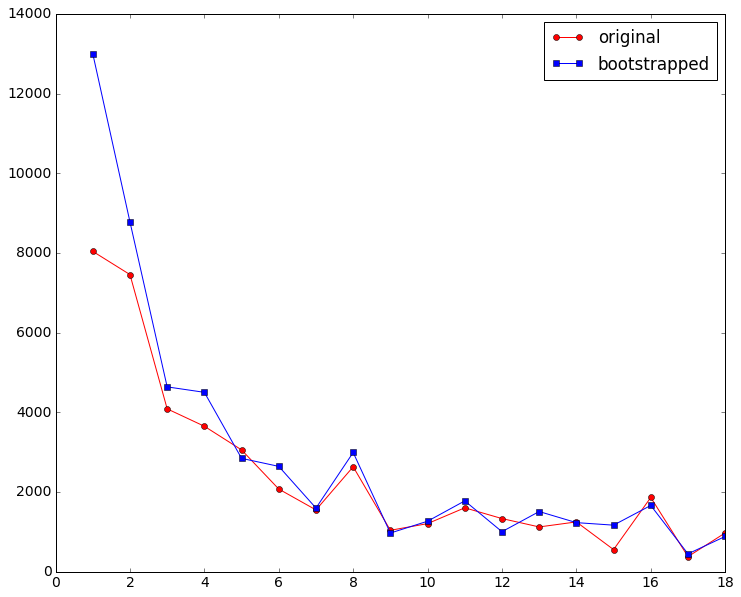

In [51]:
pylab.plot(fs_ery.fold(), "ro-", label="original")
pylab.plot(fs_ery_boot.fold(), 'bs-', label="bootstrapped")
pylab.legend()

In [52]:
# get number of segregating sites for original spectrum

fs_ery.S()

43905.909479000002

In [53]:
# get number of segregating sites for bootstrapped spectrum

fs_ery_boot.S()

52947.729016999998

In [62]:
# get total number of sites in the original spectrum

fs_ery.data.sum()

1638467.9999999998

In [63]:
# get total number of sites in the bootstrapped spectrum

fs_ery_boot.data.sum()

1618903.9999969997

That looks good: similar but not almost identical values.

**This really does look like a proper bootstrap!**

I need to generate a second bootstrapped SFS to convince myself that this is actually working.

In [54]:
% ll

total 131900
-rw-rw-r-- 1 claudius   300658 Jun 20 12:01 0_boot.contigs
-rw-rw-r-- 1 claudius 17624911 Jun 20 13:42 0_boot.extract
-rw-rw-r-- 1 claudius   473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius   300658 May 13 09:25 0_boot.rf
-rw-rw-r-- 1 claudius 29326563 May 13 09:24 0_boot.sites
-rw-rw-r-- 1 claudius    45188 May 13 09:25 0_boot.sites.bin
-rw-rw-r-- 1 claudius   824026 May 13 09:25 0_boot.sites.idx
-rw-rw-r-- 1 claudius    73375 Jun 15 21:41 5000_uniq_sites
-rw-rw-r-- 1 claudius      199 Jun 15 21:42 5000_uniq_sites.bin
-rw-rw-r-- 1 claudius     4133 Jun 15 21:42 5000_uniq_sites.idx
lrwxrwxrwx 1 claudius      108 Jun 30 10:37 all.sites -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites
-rw-rw-r-- 1 claudius    70791 Jun 30 10:45 all.sites.bin
-rw-rw-r-- 1 claudius  1297713 Jun 30 10:45 all.sites.idx
-rw-rw-r-- 1 claudius      773 Jun 15 21:42 angsdput.arg
lrwxrwxrwx 1 claudius       18 May 13 09:30 Big

In [55]:
# open sites file and read into dictionary
# contigs as keys, with sites as values collected in array 

SITES = defaultdict(list)

with open("all.sites") as sites_file:
    for line in sites_file:
        contig, site = line.strip().split()
        SITES[contig].append(site)

In [56]:
# efficient bootstrapping of keys with numpy
# np.random.choice

n_contigs = len(SITES.keys())

boot_contigs = np.random.choice(SITES.keys(), size=n_contigs, replace=True)

In [57]:
# turn array of contigs into a hash with counts
boot_contigs_dict = Counter(boot_contigs)

In [58]:
len(boot_contigs_dict)

21765

In [59]:
# write out bootstrapped *rf file

import string

c = 0 # initialise contig count

# create iterator over filenames
fnames = product(string.lowercase, repeat=2)

# get next file name from iterator
fn = fnames.next()

# open new file for writing and get filehandle
out = open("split_rf/" + fn[0] + fn[1], "w")

# iterate over Counter dict of bootstrapped contigs, key=contig name, value=count (rep)
for contig,rep in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
    c+=rep
    if c > 500: # write up to 500 contigs to each split rf file
        out.close() # close current rf file
        fn = fnames.next() # get next file name from iterator
        out = open("split_rf/" + fn[0] + fn[1], "w") # open new rf file for writing
        c = rep
    for _ in range(rep): # write contig name to rf file as often as it occurs in the bootstrap resample
        out.write(contig + "\n")

In [61]:
boot_contigs_dict['Contig_10071']

5

In [64]:
fs_ery_boot_1 = dadi.Spectrum.from_file("SAF/with_nonoverlap_boot.rf/ERY/ERY.unfolded.sfs.boot_1.dadi")

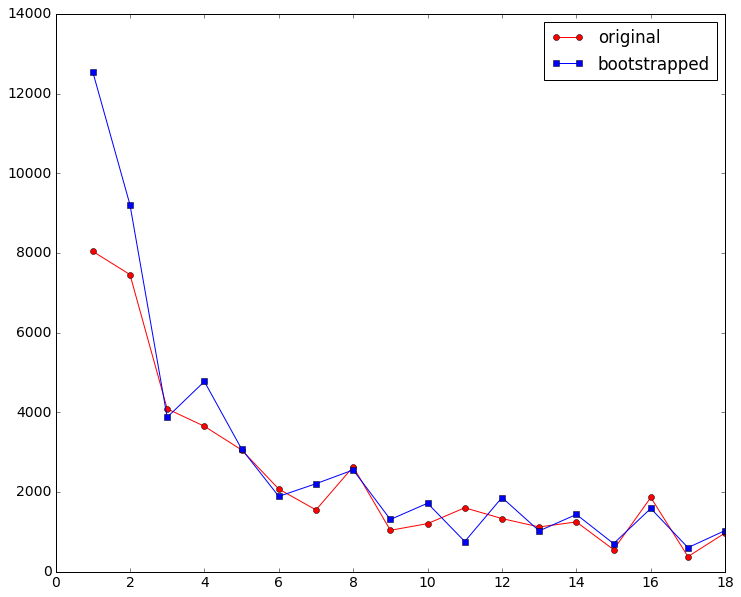

In [65]:
pylab.plot(fs_ery.fold(), "ro-", label="original")
pylab.plot(fs_ery_boot_1.fold(), 'bs-', label="bootstrapped")
pylab.legend()

In [66]:
fs_ery_boot_1.data.sum()

1620889.0

This looks really good. I am convinced that this bootstrapping works!

Now I need to create an programme that does this over and over again.

In [2]:
import numpy as np

In [4]:
# open regions file and read into numpy array

REGIONS = []

with open("all.rf") as regions_file:
    for line in regions_file:
        contig = line.strip()
        REGIONS.append(contig)

In [5]:
REGIONS[:10]

['Contig_16',
 'Contig_17',
 'Contig_40',
 'Contig_46',
 'Contig_53',
 'Contig_99',
 'Contig_179',
 'Contig_181',
 'Contig_186',
 'Contig_195']

In [6]:
len(REGIONS)

34343

In [7]:
# efficient bootstrapping of contigs with numpy
# np.random.choice

n_contigs = len(REGIONS)

boot_contigs = np.random.choice(REGIONS, size=n_contigs, replace=True)

In [8]:
from collections import Counter

In [9]:
boot_contigs_dict = Counter(boot_contigs)

In [10]:
len(boot_contigs_dict)

21644

In [11]:
% ll

total 131956
-rw-rw-r-- 1 claudius   300658 Jun 20 12:01 0_boot.contigs
-rw-rw-r-- 1 claudius 17624911 Jun 20 13:42 0_boot.extract
-rw-rw-r-- 1 claudius   473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius   300658 May 13 09:25 0_boot.rf
-rw-rw-r-- 1 claudius 29326563 May 13 09:24 0_boot.sites
-rw-rw-r-- 1 claudius    45188 May 13 09:25 0_boot.sites.bin
-rw-rw-r-- 1 claudius   824026 May 13 09:25 0_boot.sites.idx
-rw-rw-r-- 1 claudius    73375 Jun 15 21:41 5000_uniq_sites
-rw-rw-r-- 1 claudius      199 Jun 15 21:42 5000_uniq_sites.bin
-rw-rw-r-- 1 claudius     4133 Jun 15 21:42 5000_uniq_sites.idx
lrwxrwxrwx 1 claudius      105 Jun 30 19:27 all.rf -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.rf
lrwxrwxrwx 1 claudius      108 Jun 30 10:37 all.sites -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites
-rw-rw-r-- 1 claudius    70791 Jun 30 10:45 all.sites.bin
-r

In [12]:
% ll split_rf/

total 552
-rw-rw-r-- 1 claudius 5922 Jun 30 18:13 aa
-rw-rw-r-- 1 claudius 6213 Jun 30 18:13 ab
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 ac
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 ad
-rw-rw-r-- 1 claudius 6474 Jun 30 18:13 ae
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 af
-rw-rw-r-- 1 claudius 6487 Jun 30 18:13 ag
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 ah
-rw-rw-r-- 1 claudius 6474 Jun 30 18:13 ai
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 aj
-rw-rw-r-- 1 claudius 6500 Jun 30 18:13 ak
-rw-rw-r-- 1 claudius 6487 Jun 30 18:13 al
-rw-rw-r-- 1 claudius 6487 Jun 30 18:13 am
-rw-rw-r-- 1 claudius 6864 Jun 30 18:13 an
-rw-rw-r-- 1 claudius 6986 Jun 30 18:13 ao
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 ap
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 aq
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 ar
-rw-rw-r-- 1 claudius 6986 Jun 30 18:13 as
-rw-rw-r-- 1 claudius 6972 Jun 30 18:13 at
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 au
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 av
-rw-rw-r-- 1 claudius 7000 Jun 30 18:13 aw
-

In [13]:
import subprocess32 as sp

In [14]:
# remove split regions files from previous bootstrap

sp.call("rm -f split_rf/*", shell=True)

0

In [15]:
% ll split_rf/

total 0


In [16]:
% ll SAF/ERY

total 0


In [17]:
sp.call("rm -f SAF/ERY/*", shell=True)
sp.call("rm -f SAF/PAR/*", shell=True)

0

In [19]:
# write out bootstrapped *rf files

import string
from itertools import product

c = 0 # initialise contig count

# create iterator over filenames
fnames = product(string.lowercase, repeat=2)

# get next file name from iterator
fn = fnames.next()

# open new file for writing and get filehandle
out = open("split_rf/" + fn[0] + fn[1], "w")

# iterate over Counter dict of bootstrapped contigs, key=contig name, value=count (rep)
for contig,rep in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
    c+=rep
    if c > 500: # write up to 500 contigs to each split rf file
        out.close() # close current rf file
        fn = fnames.next() # get next file name from iterator
        out = open("split_rf/" + fn[0] + fn[1], "w") # open new rf file for writing
        c = rep
    for _ in range(rep): # write contig name to rf file as often as it occurs in the bootstrap resample
        out.write(contig + "\n")

### estimate SAF's

In [20]:
cmd = 'ls split_rf/* | parallel -j 12 "angsd -bam PAR.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/PAR/PAR.unfolded.{/} -fold 0 \
-sites all.sites -rf {} -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"'

In [21]:
cmd

'ls split_rf/* | parallel -j 12 "angsd -bam PAR.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/PAR/PAR.unfolded.{/} -fold 0 -sites all.sites -rf {} -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"'

In [22]:
sp.call(cmd, shell=True)

0

In [25]:
cmd = cmd.replace("PAR", "ERY")
cmd

'ls split_rf/* | parallel -j 12 "angsd -bam ERY.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out SAF/ERY/ERY.unfolded.{/} -fold 0 -sites all.sites -rf {} -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"'

In [26]:
sp.call(cmd, shell=True)

0

In [27]:
cmd = "realSFS cat -outnames SAF/ERY/ERY.unfolded.merged SAF/ERY/*saf.idx 2>/dev/null"
cmd

'realSFS cat -outnames SAF/ERY/ERY.unfolded.merged SAF/ERY/*saf.idx 2>/dev/null'

In [28]:
sp.call(cmd, shell=True)

0

In [30]:
cmd = cmd.replace("ERY", "PAR")

In [31]:
sp.call(cmd, shell=True)

0

In [37]:
cmd = "realSFS SAF/ERY/ERY.unfolded.merged.saf.idx -P 20 2>/dev/null > SFS/1D/ERY/ERY.unfolded.{0:04d}.sfs".format(1)
cmd

'realSFS SAF/ERY/ERY.unfolded.merged.saf.idx -P 20 2>/dev/null > SFS/1D/ERY/ERY.unfolded.0001.sfs'

In [38]:
p = sp.Popen(cmd, shell=True)

In [40]:
cmd = cmd.replace("ERY", "PAR")
cmd

'realSFS SAF/PAR/PAR.unfolded.merged.saf.idx -P 20 2>/dev/null > SFS/1D/PAR/PAR.unfolded.0001.sfs'

In [41]:
p.poll()

0

In [42]:
p = sp.Popen(cmd, shell=True)

In [44]:
p.poll()

0

In [46]:
cmd = "realSFS SAF/ERY/ERY.unfolded.merged.saf.idx SAF/PAR/PAR.unfolded.merged.saf.idx -P 20 2>/dev/null > SFS/2D/EryPar.unfolded.{0:04d}.sfs2d".format(1)
cmd

'realSFS SAF/ERY/ERY.unfolded.merged.saf.idx SAF/PAR/PAR.unfolded.merged.saf.idx -P 20 2>/dev/null > SFS/2D/EryPar.unfolded.0001.sfs2d'

In [48]:
% ll SAF/ERY/ERY.unfolded.merged.saf.idx SAF/PAR/PAR.unfolded.merged.saf.idx

-rw-rw-r-- 1 claudius 913078 Jun 30 20:01 SAF/ERY/ERY.unfolded.merged.saf.idx
-rw-rw-r-- 1 claudius 678328 Jun 30 20:03 SAF/PAR/PAR.unfolded.merged.saf.idx


In [47]:
sp.call(cmd, shell=True)

0

This stops with an error. Apparently, finding the overlap in sites between two bootstrapped SAF files is not straightforward. See ANGSD issue [#86](https://github.com/ANGSD/angsd/issues/86).

+ read in a regions file containing all contigs
+ bootstrap those contigs
+ turn bootstrapped contigs array into a Counter dict
+ clean split_rf and SAF/ERY and SAF/PAR directory
+ write out split rf files
+ run angsd on split rf files in parallel for ERY and for PAR
+ concatenate split saf files for ERY and PAR
+ estimate 1D SFS
+ estimate 2D SFS

## Get intersection of sites between ERY and PAR

I would like to create a `sites` file that only contains sites for which there are at least 9 individuals in _each_ population with read data. I have previously created SAF files for each population including only sites with read data from at least 9 individuals. I have extracted those sites from the SAF files. While doing that I also sorted on contig number, then on position within contig. This will be required by the following algorithm for finding the intersection between these two `sites` files.

In [4]:
% ll ../SAFs/ERY/*sites

-rw-rw-r-- 1 claudius 27705674 Aug  9 21:42 ../SAFs/ERY/ERY.sites


In [5]:
% ll ../SAFs/PAR/*sites

-rw-rw-r-- 1 claudius 20530830 Aug  9 21:43 ../SAFs/PAR/PAR.sites


In [6]:
ery_sites = open("../SAFs/ERY/ERY.sites", "r")
par_sites = open("../SAFs/PAR/PAR.sites", "r")

In [7]:
from itertools import izip

In [8]:
i=0
for ery,par in izip(ery_sites, par_sites):
    i+=1
    print ery.rstrip(), par.rstrip()
    if i>10: break

Contig_16	8 Contig_40	8
Contig_16	9 Contig_40	9
Contig_16	10 Contig_40	10
Contig_16	11 Contig_40	11
Contig_16	12 Contig_40	12
Contig_16	13 Contig_40	13
Contig_16	14 Contig_40	14
Contig_16	15 Contig_40	15
Contig_16	16 Contig_40	16
Contig_16	17 Contig_40	17
Contig_16	18 Contig_40	18


In [12]:
ery_sites.seek(0)
par_sites.seek(0)

i=0

ery_forward = True
par_forward = True

while 1: 
    # stop loop when reaching end of file
    if ery_forward:
        try:
            ery = ery_sites.next()
        except:
            break 
    if par_forward:
        try:
            par = par_sites.next()
        except:
            break
    # extract contig ID and position within contig
    e = ery.replace("Contig_", "").rstrip().split()
    p = par.replace("Contig_", "").rstrip().split()
    # if contig ID of ery lower than of par
    if int(e[0]) < int(p[0]): 
        ery_forward = True 
        par_forward = False
    elif int(e[0]) > int(p[0]):
        ery_forward = False
        par_forward = True
    # if position within contig of ery lower than of par
    elif int(e[1]) < int(p[1]):
        ery_forward = True 
        par_forward = False
    elif int(e[1]) > int(p[1]):
        ery_forward = False
        par_forward = True
    else:
        print ery,
        ery_forward = True
        par_forward = True
        i+=1
        if i > 200: break

Contig_40	8
Contig_40	9
Contig_40	10
Contig_40	11
Contig_40	12
Contig_40	13
Contig_40	14
Contig_40	15
Contig_40	16
Contig_40	17
Contig_40	18
Contig_40	19
Contig_40	20
Contig_40	21
Contig_40	22
Contig_40	23
Contig_40	24
Contig_40	25
Contig_40	26
Contig_40	27
Contig_40	28
Contig_40	29
Contig_40	30
Contig_40	31
Contig_40	32
Contig_40	33
Contig_40	34
Contig_40	35
Contig_40	36
Contig_40	37
Contig_40	38
Contig_40	39
Contig_40	40
Contig_40	41
Contig_40	42
Contig_40	43
Contig_40	44
Contig_40	45
Contig_40	46
Contig_40	47
Contig_53	8
Contig_53	9
Contig_53	10
Contig_53	11
Contig_53	12
Contig_53	13
Contig_53	14
Contig_53	15
Contig_53	16
Contig_53	17
Contig_53	18
Contig_53	19
Contig_53	20
Contig_53	21
Contig_53	22
Contig_53	23
Contig_53	24
Contig_53	25
Contig_53	26
Contig_53	27
Contig_53	28
Contig_53	29
Contig_53	30
Contig_53	31
Contig_53	32
Contig_53	33
Contig_53	34
Contig_53	35
Contig_53	36
Contig_53	37
Contig_53	38
Contig_53	39
Contig_53	40
Contig_53	41
Contig_53	42
Contig_53	43
Contig_53	44
Con

That seems to work correctly.

In [15]:
def printIntersection(fh_1, fh_2, out_fh):
    ery_forward = True
    par_forward = True

    while 1: 
        # stop loop when reaching end of file
        if ery_forward:
            try:
                ery = fh_1.next()
            except:
                break 
        if par_forward:
            try:
                par = fh_2.next()
            except:
                break
        # extract contig ID and position within contig
        e = ery.replace("Contig_", "").rstrip().split()
        p = par.replace("Contig_", "").rstrip().split()
        # if contig ID of ery lower than of par
        if int(e[0]) < int(p[0]): 
            ery_forward = True 
            par_forward = False
        elif int(e[0]) > int(p[0]):
            ery_forward = False
            par_forward = True
        # if position within contig of ery lower than in par
        elif int(e[1]) < int(p[1]):
            ery_forward = True 
            par_forward = False
        elif int(e[1]) > int(p[1]):
            ery_forward = False
            par_forward = True
        else:
            out_fh.write(ery)
            ery_forward = True
            par_forward = True

In [13]:
?int

In [16]:
ery_sites = open("../SAFs/ERY/ERY.sites", "r")
par_sites = open("../SAFs/PAR/PAR.sites", "r")

In [17]:
ery_sites.seek(0)
par_sites.seek(0)

In [18]:
out = open("from_SAFs_minInd9_overlapping.sites", "w")

In [19]:
printIntersection(ery_sites, par_sites, out)

In [20]:
% ll

total 144500
-rw-rw-r-- 1 claudius   300658 Jun 20 12:01 0_boot.contigs
-rw-rw-r-- 1 claudius 17624911 Jun 20 13:42 0_boot.extract
-rw-rw-r-- 1 claudius   473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius   300658 May 13 09:25 0_boot.rf
-rw-rw-r-- 1 claudius 29326563 May 13 09:24 0_boot.sites
-rw-rw-r-- 1 claudius    45188 May 13 09:25 0_boot.sites.bin
-rw-rw-r-- 1 claudius   824026 May 13 09:25 0_boot.sites.idx
-rw-rw-r-- 1 claudius    73375 Jun 15 21:41 5000_uniq_sites
-rw-rw-r-- 1 claudius      199 Jun 15 21:42 5000_uniq_sites.bin
-rw-rw-r-- 1 claudius     4133 Jun 15 21:42 5000_uniq_sites.idx
lrwxrwxrwx 1 claudius      105 Jun 30 19:27 all.rf -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.rf
lrwxrwxrwx 1 claudius      108 Jun 30 10:37 all.sites -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.sites
-rw-rw-r-- 1 claudius    70791 Jun 30 10:45 all.sites.bin
-r

In [20]:
! wc -l from_SAFs_minInd9_overlapping.sites

1130592 from_SAFs_minInd9_overlapping.sites


The unfolded 2D SFS estimated with these two SAF files and `realSFS` contains 1.13 million sites (see line 1449 in `assembly.sh`), summing over the SFS. So this seems to have worked correctly.

Another way to get to the overlapping sites is directly from the `samtools depth` file. See line 1320 in `assembly.sh` for the command line that created a depth file for the final filtered sites that I used for ANGSD analysis.  

Counting sites with at least 9 individuals with read data in ERY and PAR in the depth file confirms that the number of overlapping sites must be around 1.13 million (see `assembly.sh`, line 2541 onwards). However, the numbers counted from the depth file are slightly higher than the number of sites in the SAF files, probably due to some additional filtering via the `angsd -dosaf` commands (see line 1426 onwards in `assembly.sh`). It really can only be the mapping quality filter. Note that the site coverages in the depth file were from reads with MQ at least 5. It could be that `-Q 5` in the `samtools depth` command means `>=5`, whereas `minMapQ 5` for ANGSD means `>5`.

In [28]:
% ll ../Quality_Control/

total 282420
-rw-rw-r-- 1 claudius      4000 Dec 11  2016 contigs_Gt999Cov
-rw-r--r-- 1 claudius 263754704 Dec 11  2016 depth.table.RData
-rw-rw-r-- 1 claudius         4 Dec 11  2016 global.Q99.cov
-rw-rw-r-- 1 claudius      5545 Dec 11  2016 gtGlobalQ99.contigs
-rw-rw-r-- 1 claudius   7977170 Dec 11  2016 ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.depths.gz
-rw-rw-r-- 1 claudius   8626346 Dec 11  2016 ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.sorted.depths.gz
-rw-rw-r-- 1 claudius      6163 Dec 11  2016 ParEry.qc.arg
-rw-rw-r-- 1 claudius   4122716 Dec 11  2016 ParEry.qc.counts.gz
-rw-rw-r-- 1 claudius      4102 Dec 11  2016 ParEry.qc.depthGlobal
-rw-rw-r-- 1 claudius     80008 Dec 11  2016 ParEry.qc.depthSample
-rw-rw-r-- 1 claudius   4555828 Dec 11  2016 ParEry.qc.pos.gz
drwxr-xr-x 3 claudius      4096 Dec 11  2016 QC_cache/
drwxr-xr-x 6 claudius      4096 Dec 11  2016 QC_files/
-rw-r--r-- 1 c

It is this file: `ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.depths.gz`.

The sites in this depth file have at least 15 individuals with each at least 3x coverage. The first two columns in this file are contig ID and position. The remaining 36 columns contain the coverage for each individual. I believe columns 3 to 20 belong to ERY individuals and columns 21 to 38 to PAR individuals. Is used `gawk` commands to extract those sites (see line 2544 onwards in `assembly.sh`). The number of overlapping sites counted from the depth file is 1,143,453. So slightly higher than the overlap between the two SAF files. I am therefore going to use the sites file created from the overlap between the SAF files.

## plot SFS from only overlapping sites

I have estimated 1D SFS for ERY and PAR using this sites file containing only overlapping sites. See `assembly.sh`, line 2576 onwards, for the details.

In [1]:
import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

error in importing Two Locus modules


In [4]:
% ll minInd9_overlapping/SFS/ERY

total 8
-rw-rw-r-- 1 claudius 418 Aug 10 17:19 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius 464 Aug 10 17:57 ERY.unfolded.sfs.dadi


In [37]:
fs_ery = dadi.Spectrum.from_file("minInd9_overlapping/SFS/original/ERY/ERY.unfolded.sfs.dadi")

In [7]:
fs_ery.pop_ids = ['ery']

In [38]:
fs_par = dadi.Spectrum.from_file("minInd9_overlapping/SFS/original/PAR/PAR.unfolded.sfs.dadi")

In [9]:
fs_par.pop_ids = ['par']

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['font.size'] = 10

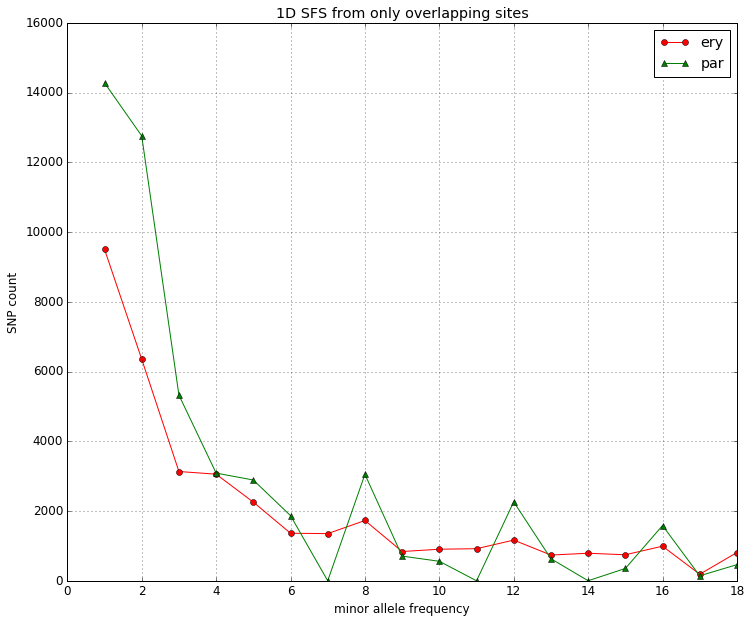

I would have expected these 1D SFS to look more like the marginal spectra from the 2D spectrum (see [05_2D_models.ipynb](../../DADI/05_2D_models.ipynb)). For the estimation of these SFS's, I have run `realSFS` without the accelerated mode and specified convergence parameters that allowed it to find a unique optimum (as I observed with previous 1D SFS from also non-overlapping sites). The 2D SFS I had estimated with the accelerated algorithm (see line 1439 in `assembly.sh`). So maybe it is not fully converged.

In [15]:
print fs_ery.data.sum()
print fs_par.data.sum()

1130775.0
1130775.0


This is the same number of sites as in the 2D SFS.

In [16]:
fs_ery.S()

36850.663118999997

The marginal spectrum for ERY had 31,162 segregating sites.

In [17]:
fs_par.S()

49967.999108000011

The marginal spectrum for PAR had 41,419 segregating sites.

In [18]:
fs_ery.pi()/fs_ery.data.sum()

0.0071484913925559659

The $\pi_{site}$ for ERY from the marginal spectrum was 0.006530.

In [19]:
fs_par.pi()/fs_par.data.sum()

0.0080453672472375302

The $\pi_{site}$ for PAR from the marginal spectrum was 0.007313.

I have estimated a 2D SFS from the SAF files created with the overlapping.sites file above (see line 2622 in assembly.sh): `from_SAFs_minInd9_overlapping.sites`. I have done an exhaustive optimisation which took almost 6 hours on all 24 virtual cores of huluvu.

In [2]:
# get 2D SFS estimated from SAF files containing only overlapping sites 

sfs2d_unfolded = dadi.Spectrum.from_file("minInd9_overlapping/SFS/original/EryPar.unfolded.sfs.dadi")

In [3]:
sfs2d_unfolded.pop_ids = ['ery', 'par']

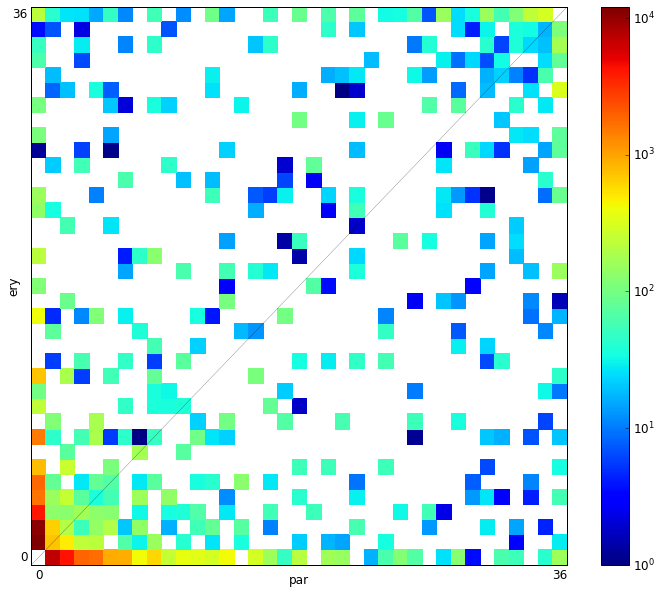

In [8]:
dadi.Plotting.plot_single_2d_sfs(sfs2d_unfolded, vmin=1, cmap='jet')

To estimate this 2D SFS, I (inadvertently) ran `realSFS` specifying the PAR SAF file before the ERY SAF file. So the axis labelling needs to be switched or the matrix transposed.

In [9]:
sfs2d_unfolded.pop_ids = ['par', 'ery']

In [10]:
sfs2d = sfs2d_unfolded.fold()

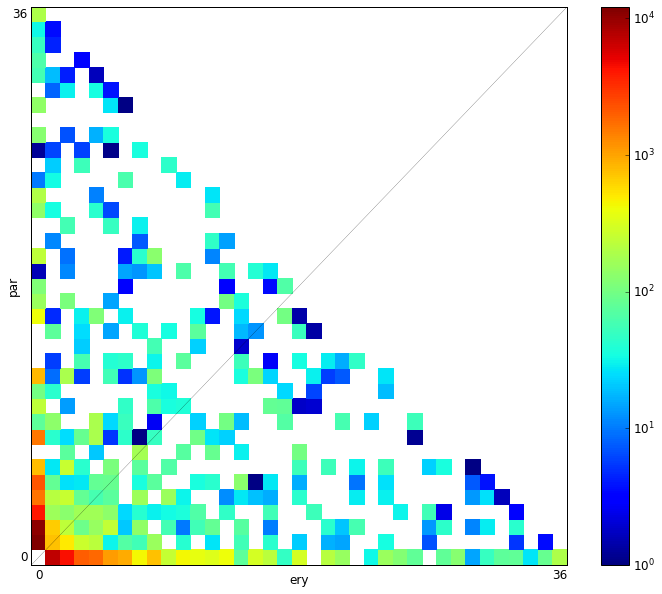

In [11]:
dadi.Plotting.plot_single_2d_sfs(sfs2d, vmin=1, cmap='jet')

In [12]:
# transpose the matrix

sfs2d = dadi.Spectrum.transpose(sfs2d)

In [13]:
sfs2d.pop_ids.reverse()

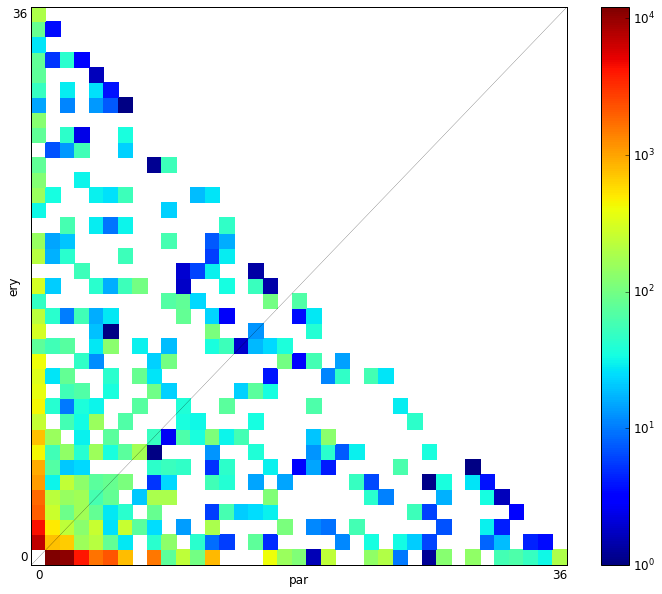

In [14]:
dadi.Plotting.plot_single_2d_sfs(sfs2d, vmin=1, cmap='jet')

I think it would be good to plot the residuals between this and my previous 2D SFS, that I estimated _without_ exhaustive search and used for $F_{ST}$ estimation as well as all 2D model fitting so far.

I have previously estimated a 2D SFS from SAF files that contained all sites with at least 9 individuals with read data in the population. `realSFS` had automatically determined the intersection of sites between ERY and PAR when estimating the 2D SFS. I have estimated this previous 2D SFS _without_ exhaustive optimisation.

In [15]:
# get previous 2D SFS

prev_sfs2d_unfolded = dadi.Spectrum.from_file("../../DADI/dadiExercises/EryPar.unfolded.2dsfs.dadi_format")

In [16]:
prev_sfs2d_unfolded.pop_ids = ['ery', 'par']

In [17]:
prev_sfs2d = prev_sfs2d_unfolded.fold()

In [61]:
# get residuals between previous and new 2D SFS

resid = prev_sfs2d - sfs2d

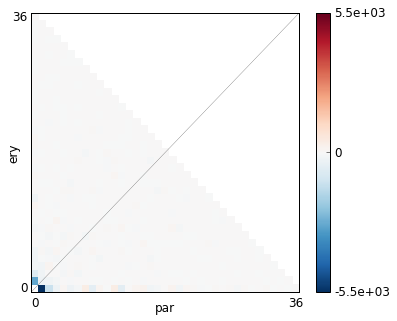

In [62]:
# plot absolute residuals
plt.figure(figsize=(6,5))
dadi.Plotting.plot_2d_resid(resid)

Apparently, there are large absolute differences in the [0, 1] and [1, 0] frequency classes as might be expected, since these have the highest expected count. The new 2D SFS (with exhaustive optimisation) has many more SNP's in those two frequency classes.

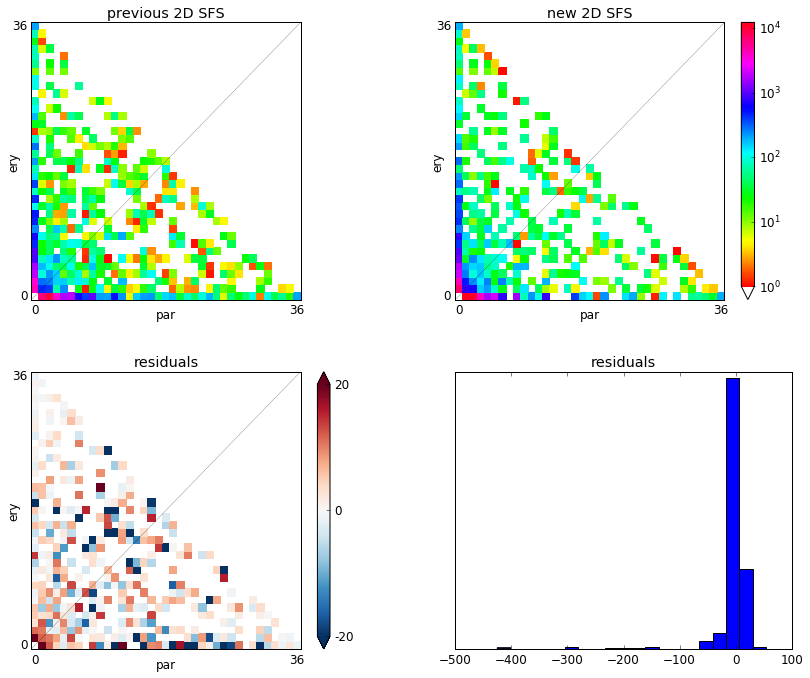

In [20]:
# plot Poisson residuals, saturating at 20 standard deviations in the heatmap of residuals

dadi.Plotting.plot_2d_comp_Poisson(data=prev_sfs2d, model=sfs2d, vmin=1, resid_range=20, title=['previous 2D SFS', 'new 2D SFS'])

The new 2D SFS seems to have fewer middle and high frequency SNP's in PAR that are absent from ERY (lowest row) and more low frequency variants, shared and unshared (lower left corner) than the previous 2D SFS.

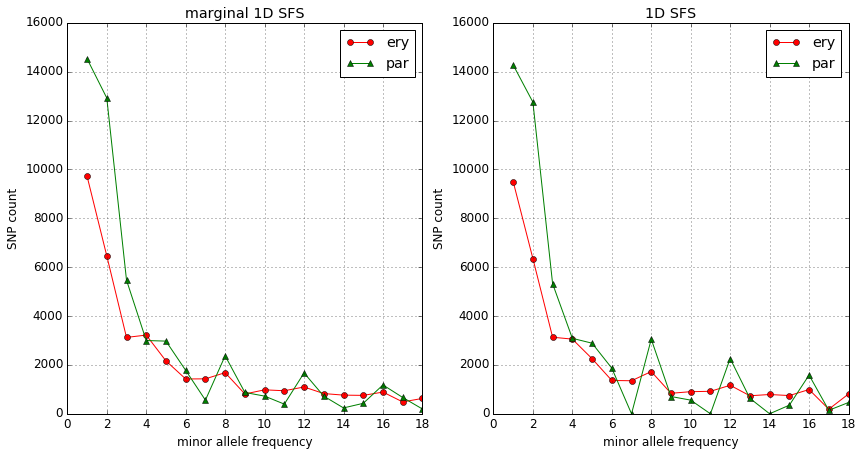

In [59]:
fs_ery_m = sfs2d.marginalize([1])
fs_par_m = sfs2d.marginalize([0])

max(fs_ery_m.data[1:]), max(fs_ery.fold().data[1:]), max(fs_par_m.data[1:]), max(fs_par.fold().data[1:])

plt.figure(figsize=(14, 7))

m = max(fs_ery_m.data[1:]), max(fs_ery.fold().data[1:]), max(fs_par_m.data[1:]), max(fs_par.fold().data[1:])

plt.subplot(121)
plt.plot(fs_ery_m, 'ro-', label='ery')
plt.plot(fs_par_m, 'g^-', label = 'par')
plt.ylim(0, max(m)*1.1)
plt.grid()
plt.legend()
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')
plt.title('marginal 1D SFS')

plt.subplot(122)
plt.plot(fs_ery.fold(), 'ro-', label='ery')
plt.plot(fs_par.fold(), 'g^-', label = 'par')
plt.ylim(0, max(m)*1.1)
plt.grid()
plt.legend()
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')
plt.title('1D SFS')

The marginal 1D spectra from the 2D spectrum look very similar to the directly estimated 1D SFS's. This is as expected, since both are estimated from the same sites: those that have at least 9 individuals with read data in _both_ ERY and PAR. 

**I have now re-estimated the 2D SFS from SAF files containing also non-overlapping sites with exhaustive search parameters (see line 2629 in `assembly.sh`).**

In [21]:
# get re-stimated 2D SFS from non-fully-overlapping SAF files

prev_sfs2d_unfolded_exhaust = dadi.Spectrum.from_file("../FST/EryPar.unfolded.exhaustive.2dsfs.dadi")

In [22]:
prev_sfs2d_unfolded_exhaust.pop_ids = ['ery', 'par']

In [23]:
prev_sfs2d_exhaust = prev_sfs2d_unfolded_exhaust.fold()

In [63]:
# get residuals betwee non-exhaust and exhaust 2D SFS, 
# both estimated from non-fully-overlapping SAF files

resid = prev_sfs2d - prev_sfs2d_exhaust

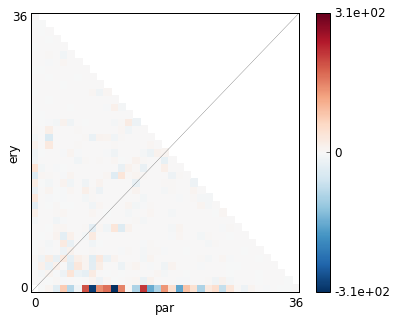

In [64]:
# plot absolute residuals
plt.figure(figsize=(6,5))
dadi.Plotting.plot_2d_resid(resid)

These are small residuals.

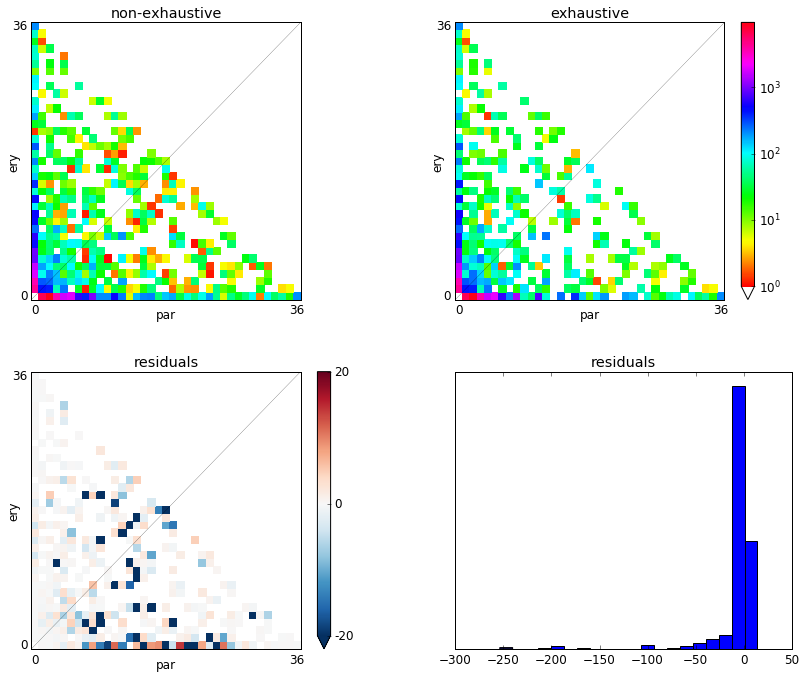

In [65]:
# plot Poisson residuals, saturating at 20 standard deviations in the heatmap of residuals

dadi.Plotting.plot_2d_comp_Poisson(data=prev_sfs2d, model=prev_sfs2d_exhaust, vmin=1, \
                                   resid_range=20, title=['non-exhaustive', 'exhaustive'])

In [66]:
fs_ery = prev_sfs2d_exhaust.marginalize([1])
fs_par = prev_sfs2d_exhaust.marginalize([0])

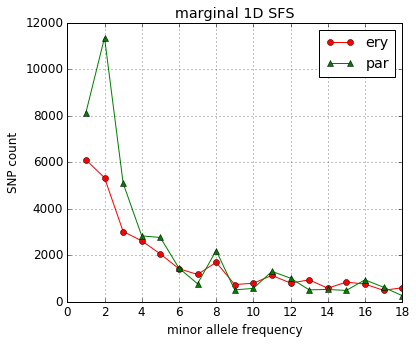

In [67]:
plt.figure(figsize=(6,5))
plt.plot(fs_ery, 'ro-', label='ery')
plt.plot(fs_par, 'g^-', label = 'par')
plt.grid()
plt.legend()
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')
plt.title('marginal 1D SFS')

Unsurprisingly, the marginal spectra also look very similar to the marginal spectra taken from the 2D SFS optimised without exhaustive search. So, the difference between the spectra estimated from full SAF files and the spectra estimated from fully overlapping SAF files is not due to differences in the degree of optimisation of the SFS.

In [27]:
# total number of sites in previous non-exhaust 2D SFS

prev_sfs2d.data.sum()

1130775.000003

In [28]:
# total number of sites in previous exhaust 2D SFS

prev_sfs2d_exhaust.data.sum()

1130774.9999900004

In [29]:
# notal number of sites in new exhaust 2D SFS (from fully overlapping SAF files)

sfs2d.data.sum()

1130774.9999909997

All three 2D spectra contain the same number of sites, indicating that they were indeed estimated from the same sites. Then why are the 2D spectra so different if estimated with SAF files containing only overlapping sites or with SAF files containing also non-overlapping sites. This does not make sense to me.

## Bootstrap regions file from only overlapping sites

+ read in a regions file containing all contigs
+ bootstrap those contigs
+ turn bootstrapped contigs array into a Counter dict
+ clean split_rf and SAF/ERY and SAF/PAR directory
+ write out split rf files
+ run angsd on split rf files in parallel for ERY and for PAR
+ concatenate split saf files for ERY and PAR
+ estimate 1D SFS
+ estimate 2D SFS

The regions file is really small. So I am first going to create 200 bootstrapped regions files.

Then I will do the SAF estimation for these bootstrapped regions files. The SAF files are about 100MB large. So keeping them will require several giga bytes of storage, but I have that on /data3, where there is currently 1.7TB storage available.

Finally, I am going to estimate 1D SFS from these SAF files.

### bootstrap regions file

In [22]:
% ll *rf

-rw-rw-r-- 1 claudius 473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius 300658 May 13 09:25 0_boot.rf
lrwxrwxrwx 1 claudius    105 Jun 30 19:27 all.rf -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.rf
-rw-rw-r-- 1 claudius 313201 Aug 10 16:08 from_SAFs_minInd9_overlapping.rf

split_rf:
total 364
-rw-rw-r-- 1 claudius 5969 Aug 10 16:18 aa
-rw-rw-r-- 1 claudius 6496 Aug 10 16:18 ab
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ac
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ad
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ae
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 af
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ag
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ah
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ai
-rw-rw-r-- 1 claudius 6848 Aug 10 16:18 aj
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 ak
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 al
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 am
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 an
-rw-rw-r-- 1 claudius 7000 Aug 1

In [25]:
regions = []

with open("from_SAFs_minInd9_overlapping.rf", "r") as rf:
    for r in rf:
        regions.append(r.rstrip())

In [26]:
regions[:10]

['Contig_40',
 'Contig_53',
 'Contig_179',
 'Contig_181',
 'Contig_195',
 'Contig_219',
 'Contig_264',
 'Contig_302',
 'Contig_308',
 'Contig_366']

In [28]:
len(regions)

22742

In [31]:
len(set(regions))

22742

In [27]:
import numpy as np

In [29]:
# efficient bootstrapping of array with numpy
# np.random.choice

n_contigs = len(regions)

boot_contigs = np.random.choice(regions, size=n_contigs, replace=True)

In [30]:
len(boot_contigs)

22742

In [32]:
len(set(boot_contigs))

14406

In [33]:
# write out bootstrapped *regions file

with open("minInd9_overlapping/BOOT_RF/0_boot.rf", "w") as out:
    for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
        out.write(contig + "\n")

Now, let's redo this 199 times.

In [44]:
def bootstrapContigs(regions, index):
    """
    takes an array of contig ID's and an index for the bootstrap repetition
    """
    import numpy as np
    # get number of contigs to resample
    n_contigs = len(regions)
    # resample contigs with replacement (bootstrap)
    boot_contigs = np.random.choice(regions, size=n_contigs, replace=True)
    # write out bootstrapped *regions file
    with open("minInd9_overlapping/BOOT_RF/{:03d}_boot.rf".format(index), "w") as out:
        for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
            out.write(contig + "\n")

In [47]:
for index in range(1, 200):
    bootstrapContigs(regions, index)

### estimate SAF files

I need to read in the bootstrapped regions files again and split them for parallisation of SAF creation, but in a way that allows concatenation of split SAF files. This means repeated contigs must not be spread over split regions files. Otherwise `realSFS cat` throws an error message.

In [83]:
from glob import glob

In [88]:
sorted(glob("minInd9_overlapping/BOOT_RF/*"))[:10]

['minInd9_overlapping/BOOT_RF/000_boot.rf',
 'minInd9_overlapping/BOOT_RF/001_boot.rf',
 'minInd9_overlapping/BOOT_RF/002_boot.rf',
 'minInd9_overlapping/BOOT_RF/003_boot.rf',
 'minInd9_overlapping/BOOT_RF/004_boot.rf',
 'minInd9_overlapping/BOOT_RF/005_boot.rf',
 'minInd9_overlapping/BOOT_RF/006_boot.rf',
 'minInd9_overlapping/BOOT_RF/007_boot.rf',
 'minInd9_overlapping/BOOT_RF/008_boot.rf',
 'minInd9_overlapping/BOOT_RF/009_boot.rf']

I would like to extract the bootstrap index from the regions file name.

In [86]:
import re

In [87]:
p = re.compile(r'\d+')

In [93]:
for rf in sorted(glob("minInd9_overlapping/BOOT_RF/*"))[:20]:
    #print rf
    m = p.findall(rf)
    print m[1]

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019


In [95]:
# the same as above without a pre-compiled RE object

for rf in sorted(glob("minInd9_overlapping/BOOT_RF/*"))[:20]:
    print re.findall(r'\d+', rf)[-1]

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019


In [40]:
# read in one bootstrapped regions file

boot_contigs = []

with open("minInd9_overlapping/BOOT_RF/000_boot.rf", "r") as boot_rf:
    for contig in boot_rf:
        boot_contigs.append(contig.rstrip())

In [41]:
from collections import Counter

In [42]:
# turn array of contigs into a hash with counts

boot_contigs_dict = Counter(boot_contigs)

In [44]:
i=0
for contig,count in boot_contigs_dict.items():
    print contig, "\t", count
    i+=1
    if i > 10: break

Contig_102226 	1
Contig_8139 	2
Contig_283507 	1
Contig_177118 	1
Contig_2831 	5
Contig_215094 	1
Contig_250266 	1
Contig_281014 	3
Contig_281016 	1
Contig_108902 	1
Contig_159695 	2


Clear the directory that takes split regions files, to receive new one:

In [46]:
% ll split_rf/

total 364
-rw-rw-r-- 1 claudius 5969 Aug 10 16:18 aa
-rw-rw-r-- 1 claudius 6496 Aug 10 16:18 ab
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ac
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ad
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ae
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 af
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ag
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ah
-rw-rw-r-- 1 claudius 6500 Aug 10 16:18 ai
-rw-rw-r-- 1 claudius 6848 Aug 10 16:18 aj
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 ak
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 al
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 am
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 an
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 ao
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 ap
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 aq
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 ar
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 as
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 at
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 au
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 av
-rw-rw-r-- 1 claudius 7000 Aug 10 16:18 aw
-

In [47]:
import subprocess32 as sp

In [48]:
sp.call("rm -f split_rf/*", shell=True)

0

In [49]:
% ll split_rf/

total 0


In [50]:
import string
from itertools import product

# create iterator over filenames
fnames = product(string.lowercase, repeat=2)

In [52]:
def split_regions_file(boot_contigs_dict, fnames, size):
    """
    takes Counter dictionary of bootstrapped contigs
    and an iterator over filenames to choose
    
    writes out split regions files with repetitions of contigs
    NOT spread over different split regions files
    """
    c = 0 # initialise contig count
    # get next file name from iterator
    fn = fnames.next()
    # open new file for writing and get filehandle
    out = open("split_rf/" + fn[0] + fn[1], "w")
    # iterate over Counter dict of bootstrapped contigs, key=contig name, value=count (rep)
    for contig,rep in sorted(boot_contigs_dict.items(), key=lambda x: int(x[0].replace("Contig_", ""))):
        c+=rep
        if c > size: # write up to 'size' contigs to each split rf file
            out.close() # close current rf file
            fn = fnames.next() # get next file name from iterator
            out = open("split_rf/" + fn[0] + fn[1], "w") # open new rf file for writing
            c = rep
        for _ in range(rep): # write contig name to rf file as often as it occurs in the bootstrap resample
            out.write(contig + "\n")

In [53]:
split_regions_file(boot_contigs_dict, fnames, 400)

In [56]:
! wc -l split_rf/*

   400 split_rf/aa
   400 split_rf/ab
   400 split_rf/ac
   400 split_rf/ad
   398 split_rf/ae
   400 split_rf/af
   400 split_rf/ag
   398 split_rf/ah
   400 split_rf/ai
   400 split_rf/aj
   400 split_rf/ak
   400 split_rf/al
   400 split_rf/am
   400 split_rf/an
   399 split_rf/ao
   400 split_rf/ap
   400 split_rf/aq
   399 split_rf/ar
   399 split_rf/as
   400 split_rf/at
   400 split_rf/au
   398 split_rf/av
   400 split_rf/aw
   399 split_rf/ax
   400 split_rf/ay
   398 split_rf/az
   400 split_rf/ba
   397 split_rf/bb
   400 split_rf/bc
   400 split_rf/bd
   400 split_rf/be
   400 split_rf/bf
   400 split_rf/bg
   400 split_rf/bh
   399 split_rf/bi
   400 split_rf/bj
   400 split_rf/bk
   400 split_rf/bl
   400 split_rf/bm
   399 split_rf/bn
   400 split_rf/bo
   400 split_rf/bp
   400 split_rf/bq
   400 split_rf/br
   400 split_rf/bs
   398 split_rf/bt
   400 split_rf/bu
   399 split_rf/bv
   400 split_rf/bw
   400 split_rf/bx
   398 split_rf/by
   400 split_rf/bz
   400 split

Estimate SAF files in parallel:

In [59]:
cmd = 'ls split_rf/* | parallel -j 12 "angsd -bam PAR.slim.bamfile.list -ref Big_Data_ref.fa \
-anc Big_Data_ref.fa -out minInd9_overlapping/SAF/bootstrap/PAR/{/}.unfolded -fold 0 \
-sites from_SAFs_minInd9_overlapping.sites -rf {} -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"'

In [60]:
cmd

'ls split_rf/* | parallel -j 12 "angsd -bam PAR.slim.bamfile.list -ref Big_Data_ref.fa -anc Big_Data_ref.fa -out minInd9_overlapping/SAF/bootstrap/PAR/{/}.unfolded -fold 0 -sites from_SAFs_minInd9_overlapping.sites -rf {} -only_proper_pairs 0 -baq 1 -minMapQ 5 -minInd 9 -GL 1 -doSaf 1 -nThreads 1 2>/dev/null"'

In [61]:
sp.Popen(cmd, shell=True)

In [62]:
% ll minInd9_overlapping/SAF/bootstrap/PAR/

total 51828
-rw-rw-r-- 1 claudius    7049 Aug 11 10:45 aa.unfolded.arg
-rw-rw-r-- 1 claudius  929541 Aug 11 10:45 aa.unfolded.saf.gz
-rw-rw-r-- 1 claudius   10791 Aug 11 10:45 aa.unfolded.saf.idx
-rw-rw-r-- 1 claudius    2411 Aug 11 10:45 aa.unfolded.saf.pos.gz
-rw-rw-r-- 1 claudius    7049 Aug 11 10:45 ab.unfolded.arg
-rw-rw-r-- 1 claudius  984252 Aug 11 10:45 ab.unfolded.saf.gz
-rw-rw-r-- 1 claudius   11220 Aug 11 10:45 ab.unfolded.saf.idx
-rw-rw-r-- 1 claudius    2229 Aug 11 10:45 ab.unfolded.saf.pos.gz
-rw-rw-r-- 1 claudius    7047 Aug 11 10:45 ac.unfolded.arg
-rw-rw-r-- 1 claudius 1120741 Aug 11 10:45 ac.unfolded.saf.gz
-rw-rw-r-- 1 claudius   11324 Aug 11 10:45 ac.unfolded.saf.idx
-rw-rw-r-- 1 claudius    2659 Aug 11 10:45 ac.unfolded.saf.pos.gz
-rw-rw-r-- 1 claudius    7048 Aug 11 10:45 ad.unfolded.arg
-rw-rw-r-- 1 claudius 1035864 Aug 11 10:45 ad.unfolded.saf.gz
-rw-rw-r-- 1 claudius   11192 Aug 11 10:45 ad.unfolded.saf.idx
-rw-rw-r-- 1 claudius    2475 Aug 11 10:45 ad.unfolded

Concatenate split SAF files:

In [97]:
index = '000'

In [98]:
cmd = "realSFS cat -outnames minInd9_overlapping/SAF/bootstrap/PAR/{}.unfolded minInd9_overlapping/SAF/bootstrap/PAR/*saf.idx 2>/dev/null".format(index)
cmd

'realSFS cat -outnames minInd9_overlapping/SAF/bootstrap/PAR/000.unfolded minInd9_overlapping/SAF/bootstrap/PAR/*saf.idx 2>/dev/null'

Note that I need to give the concatenated SAF file the index of the bootstrap repetition.

In [71]:
sp.call(cmd, shell=True)

0

In [76]:
# concatenated SAF file begins with "PAR"
# remove all split SAF files, they are not need anymore

sp.call("rm -f minInd9_overlapping/SAF/bootstrap/PAR/[a-z]*", shell=True)

0

In [80]:
% ll minInd9_overlapping/SAF/bootstrap/PAR/[0-9]*

-rw-rw-r-- 1 claudius 51554721 Aug 11 10:58 minInd9_overlapping/SAF/bootstrap/PAR/000.unfolded.saf.gz
-rw-rw-r-- 1 claudius   645049 Aug 11 10:58 minInd9_overlapping/SAF/bootstrap/PAR/000.unfolded.saf.idx
-rw-rw-r-- 1 claudius   108985 Aug 11 10:58 minInd9_overlapping/SAF/bootstrap/PAR/000.unfolded.saf.pos.gz


In [81]:
% ll minInd9_overlapping/SAF/bootstrap/PAR/[!0-9]*

ls: cannot access minInd9_overlapping/SAF/bootstrap/PAR/[!0-9]*: No such file or directory


I think it would be best to put the steps of creating SAF files into a separate Python script to run in the background. I have put the code into the script `estimate_SAFs.py`.

## Bootstrap regions file from including non-overlapping sites

In [3]:
% ll *rf

-rw-rw-r-- 1 claudius 473510 Jun 30 10:23 0_boot_regions.rf
-rw-rw-r-- 1 claudius 300658 May 13 09:25 0_boot.rf
lrwxrwxrwx 1 claudius    105 Jun 30 19:27 all.rf -> ../ParEry.noSEgt2.nogtQ99Cov.noDUST.3.15.noTGCAGG.ANGSD_combinedNegFisFiltered.noGtQ99GlobalCov.sorted.rf
-rw-rw-r-- 1 claudius 313201 Aug 10 16:08 from_SAFs_minInd9_overlapping.rf

split_rf:
total 456
-rw-rw-r-- 1 claudius 4765 Aug 12 03:15 aa
-rw-rw-r-- 1 claudius 5061 Aug 12 03:15 ab
-rw-rw-r-- 1 claudius 5174 Aug 12 03:15 ac
-rw-rw-r-- 1 claudius 5187 Aug 12 03:15 ad
-rw-rw-r-- 1 claudius 5187 Aug 12 03:15 ae
-rw-rw-r-- 1 claudius 5200 Aug 12 03:15 af
-rw-rw-r-- 1 claudius 5200 Aug 12 03:15 ag
-rw-rw-r-- 1 claudius 5174 Aug 12 03:15 ah
-rw-rw-r-- 1 claudius 5200 Aug 12 03:15 ai
-rw-rw-r-- 1 claudius 5174 Aug 12 03:15 aj
-rw-rw-r-- 1 claudius 5200 Aug 12 03:15 ak
-rw-rw-r-- 1 claudius 5304 Aug 12 03:15 al
-rw-rw-r-- 1 claudius 5600 Aug 12 03:15 am
-rw-rw-r-- 1 claudius 5600 Aug 12 03:15 an
-rw-rw-r-- 1 claudius 5586 Aug 1

I am going to bootstrap `all.rf`.

In [1]:
regions = []

with open("all.rf", "r") as rf:
    for r in rf:
        regions.append(r.rstrip())

In [2]:
len(regions)

34343

In [3]:
len(set(regions))

34343

In [4]:
import numpy as np

In [5]:
# efficient bootstrapping of array with numpy
# np.random.choice

n_contigs = len(regions)

boot_contigs = np.random.choice(regions, size=n_contigs, replace=True)

In [6]:
len(boot_contigs)

34343

In [7]:
len(set(boot_contigs))

21697

In [8]:
def bootstrapContigs(regions, index):
    """
    takes an array of contig ID's and an index for the bootstrap repetition
    """
    import numpy as np
    # get number of contigs to resample
    n_contigs = len(regions)
    # resample contigs with replacement (bootstrap)
    boot_contigs = np.random.choice(regions, size=n_contigs, replace=True)
    # write out bootstrapped *regions file
    with open("including_non-overlapping/BOOT_RF/{:03d}_boot.rf".format(index), "w") as out:
        for contig in sorted(boot_contigs, key=lambda x: int(x.replace("Contig_", ""))):
            out.write(contig + "\n")

In [10]:
for index in range(0, 200):
    bootstrapContigs(regions, index)

## quick tests

In [19]:
a = ['par', 'ery']
a.reverse()
a

['ery', 'par']

In [43]:
"{:03d}".format(50)

'050'

In [7]:
ery_sites.seek(0)
par_sites.seek(0)

ery = ery_sites.next()
par = par_sites.next()
    
e = ery.replace("Contig_", "").rstrip().split()
p = par.replace("Contig_", "").rstrip().split()

print e
print p

['16', '8']
['40', '8']


In [25]:
i = 0
while 1:
    i+=1
    print i
    if i>9: break

1
2
3
4
5
6
7
8
9
10


In [29]:
s = 'abcdefg'
it = iter(s)
it

In [30]:
while 1:
    try:
        print it.next()
    except:
        break

a
b
c
d
e
f
g


In [7]:
str.replace?

In [10]:
str.strip?

In [14]:
print ery_sites.next()

Contig_16	8



In [15]:
print ery_sites.next()

Contig_16	9



In [16]:
ery_sites.seek(0)

In [17]:
print ery_sites.next()

Contig_16	8



In [18]:
s = 'abcdefg'
it = iter(s)
it

In [19]:
print it.next()

a


In [20]:
for l in it:
    print l

b
c
d
e
f
g


In [28]:
it

TypeError: expected 0 arguments, got 1

In [3]:
arr = ['aa', 'bb']
"".join(arr)

'aabb'

In [2]:
str.join?